In [10]:
from funciones_helmholtz_bem import Circle_n
from funciones_helmholtz_bem import frequencyToWavenumber
from funciones_helmholtz_bem import solveInteriorBoundary
from funciones_helmholtz_bem import solveInterior
from funciones_helmholtz_bem import phi_test_problem_1_2
from funciones_helmholtz_bem import generateInteriorPoints_test_problem_2
from funciones_helmholtz_bem import plot_solutions
from funciones_helmholtz_bem import plot_edge_scalar_field
from funciones_helmholtz_bem import plot_oriented_edges
from funciones_helmholtz_bem import generateInteriorPoints_excluding_circle
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from numpy.linalg import norm
# reload kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
from numpy.linalg import norm

# Simulación de dispersión por obstáculo circular rígido
k = 3.0
n = 50

# Crear malla circular con centro en el origen
aVertex, aElement = Circle_n(n=n, radius=np.pi/4)
size = aElement.shape[0]

# Condición Neumann homogénea: sound-hard obstacle
alpha = np.full(size, 1.0, dtype=complex)
beta  = np.full(size, 0.0, dtype=complex)
f     = np.empty(size, dtype=complex)
phi   = np.full(size, 0.0, dtype=complex)
v     = np.full(size, 0.0, dtype=complex)

# Centro de cada elemento
aCenters = 0.5 * (aVertex[aElement[:, 0]] + aVertex[aElement[:, 1]])

# Vectores tangentes y normales exteriores
theta = np.atan2(aCenters[:, 1], aCenters[:, 0])
 
# Evaluación de la onda incidente en los centros: φ_inc = exp(i k x)
kx = k * aCenters[:, 0]  # x es la primera componente
phi_inc = np.exp(1j * kx)

# Derivada normal: dφ_inc/dn = i k * exp(i k x) * n_x
f = np.cos(theta) * 1j * k * phi_inc #  n_x es la componente x de la normal


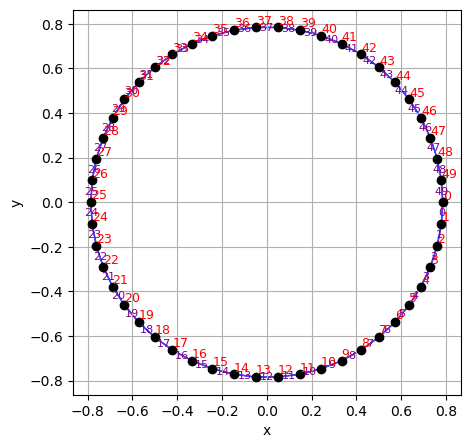

In [77]:
plot_oriented_edges(aVertex, aElement)

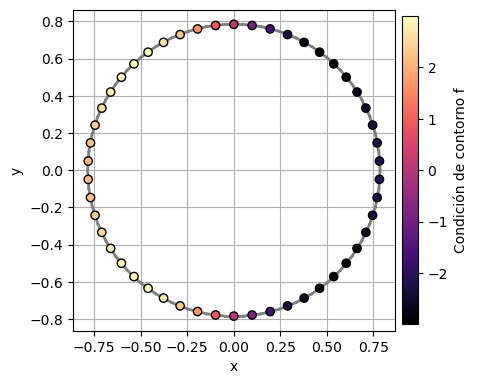

In [78]:
plot_edge_scalar_field(aCenters, aVertex, aElement, f, title="")

In [79]:
points_outside,points_inside = generateInteriorPoints_excluding_circle(Nx=n, Ny=n, xmin=-np.pi, xmax=np.pi, ymin=-np.pi, ymax=np.pi, r_exclude=np.pi/4)

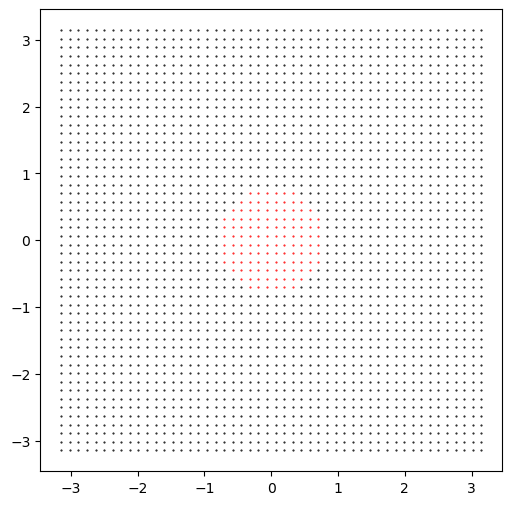

In [80]:
plt.figure(figsize=(6, 6))
plt.plot(points_outside[:, 0], points_outside[:, 1], 'k.', markersize=1)
plt.plot(points_inside[:, 0], points_inside[:, 1], 'r.', markersize=1)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Potencial incidente en los puntos interiores (inicialmente cero)
interiorIncidentPhi = np.zeros(points_outside.shape[0], dtype=complex)
c, density = None, None
v, phi = solveInteriorBoundary(k, alpha, beta, f, phi, v, aVertex, aElement, c, density, 'exterior')

interiorPhi = solveInterior(k, v, phi, interiorIncidentPhi, points_outside, aVertex, aElement, 'exterior')

num_sol = interiorPhi.real

# # Enmascarar puntos dentro del círculo de radio π/4
# r_exclude = np.pi / 4
# r2 = points_outside[:, 0]**2 + points_outside[:, 1]**2
# num_sol_masked = np.where(r2 >= r_exclude**2, num_sol, np.nan)

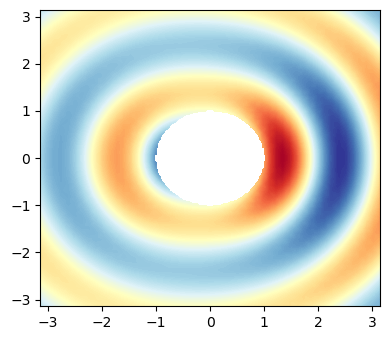

In [82]:
 
# Crear grilla regular
grid_x, grid_y = np.meshgrid(
    np.linspace(-np.pi, np.pi, 250),
    np.linspace(-np.pi, np.pi, 250)
)

# Interpolar datos en la grilla
grid_z = griddata(points_outside, num_sol, (grid_x, grid_y), method='linear')

# Aplicar máscara para excluir puntos dentro del círculo
r_exclude = 1.0
mask = (grid_x**2 + grid_y**2) < r_exclude**2
grid_z[mask] = np.nan

# Graficar con contourf
plt.figure(figsize=(4, 3.5))
contour = plt.contourf(grid_x, grid_y, grid_z, cmap="RdYlBu", levels=200)
# plt.colorbar(contour, , shrink=0.6 
plt.tight_layout()
plt.show()


In [83]:

# mat = np.full((n, n), np.nan)  
# xy_array = np.linspace(-np.pi, np.pi, n)
# X,Y = np.meshgrid(xy_array, xy_array)
# coords = np.stack((X.flatten(), Y.flatten())).T

# for nn in range(interiorPoints.shape[0]):
#     x_inter = interiorPoints[nn, 0]
#     y_inter = interiorPoints[nn, 1]
#     i_inter = round((n-1)*(x_inter/(2*np.pi) + 0.5))
#     j_inter = round((n-1) - (n-1)*(y_inter/(2*np.pi) + 0.5))
#     #print(i_inter, j_inter)
#     mat[i_inter,j_inter] = num_sol_masked[n]
      
        

In [229]:
# # Graficar usando tricontourf (puede seguir usándose si se enmascara bien)
# plt.figure(figsize=(6, 6))
# plt.tricontourf(coords[:, 0], coords[:, 1], mat.flatten(), levels=50, cmap='magma')
# plt.gca().set_aspect('equal')
# plt.colorbar(pad=0.02, aspect=20, shrink=0.6)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.tight_layout()
# plt.show()

In [251]:
# # Graficar usando tricontourf (puede seguir usándose si se enmascara bien)
# plt.figure(figsize=(6, 6))
# contourf=plt.contourf(X, Y, mat, levels=10, cmap='magma', vmin=-0.03, vmax=0.03)
# plt.gca().set_aspect('equal')
# cbar = plt.colorbar(contourf, pad=0.02, aspect=20, shrink=0.6)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.tight_layout()
# plt.show()